In [1]:
# https://www.yutaka-note.com/entry/matplotlib_inline
%matplotlib inline

In [2]:
import pycircos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Bio import SeqIO 
Garc    = pycircos.Garc
Gcircle = pycircos.Gcircle

In [3]:
#organism = "human"
df = pd.read_csv("../data/chromosome/chromosome_human.tsv", sep='\t')
df_subset = df[['chr', 'start', 'end']].copy()
df_subset['chr'] = 'H_' + df_subset['chr'].astype(str)
df_subset['organism'] = 'human'# タグをつける


# organism = "rice"
df1 = pd.read_csv("../data/chromosome/chromosome_rice_rmB1.tsv", sep='\t')
df1_subset = df1[['chr', 'start', 'end']].copy()
df1_subset['chr'] = 'R_' + df1_subset['chr'].astype(str)    
df1_subset['organism'] = 'rice'# タグをつける

combined_df = pd.concat([df_subset, df1_subset])
combined_df.reset_index(drop=True, inplace=True)
combined_df.to_csv("../data/chromosome/HR_combined.tsv", sep='\t', index=False)
combined_df

,chr,start,end,organism
0,H_1,1,248956422,human
1,H_2,1,242193529,human
2,H_3,1,198295559,human
3,H_4,1,190214555,human
4,H_5,1,181538259,human
5,H_6,1,170805979,human
6,H_7,1,159345973,human
7,H_8,1,145138636,human
8,H_9,1,138394717,human
9,H_10,1,133797422,human


In [4]:
# Initialize
circle = Gcircle(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

In [5]:
# Initialize
circle = Gcircle(figsize=(10,10))

# Set Chromosome Data
n = 935
m = 985

# Read the combined DataFrame
for index, row in combined_df.iterrows():
    name = row['chr']
    length = row['end']
    organism = row['organism']
    
    # 染色体番号だけを取得
    chrom_number_str = name.split('_')[1] # "H_1" -> "1"
    
    try:
        chrom_number = int(chrom_number_str)
        if organism == 'human':
            color = plt.cm.Blues(chrom_number / 24)  # 22+X+Yで動的に色を変える
        else:
            color = plt.cm.Greens(chrom_number / 14)  # 12+X+Yで動的に色を変える
    except ValueError:  # "X", "Y", "Mt", "Pt"など、数値に変換できない場合
        if chrom_number_str == "X":
            color = plt.cm.Blues(23 / 24)
        elif chrom_number_str == "Y":
            color = plt.cm.Blues(24 / 24)
        elif chrom_number_str == "Mt":
            color = plt.cm.Greens(13 / 14)
        elif chrom_number_str == "Pt":
            color = plt.cm.Greens(14 / 14)
        else:
            color = 'grey'
    
    arc = Garc(arc_id=name, 
               size=length, 
               interspace=0.5, 
               raxis_range=(n, m), 
               labelposition=int(30 + (m-n)/2),
               labelsize=7,
               label_visible=True,
               facecolor=color)
    circle.add_garc(arc)

<Figure size 1000x1000 with 0 Axes>

In [6]:
circle.set_garcs(0,360)

In [7]:
for arc_id in circle.garc_dict:
    circle.tickplot(arc_id, 
                    raxis_range=(985,1000), 
                    tickinterval=20000000, 
                    ticklabels=None) 

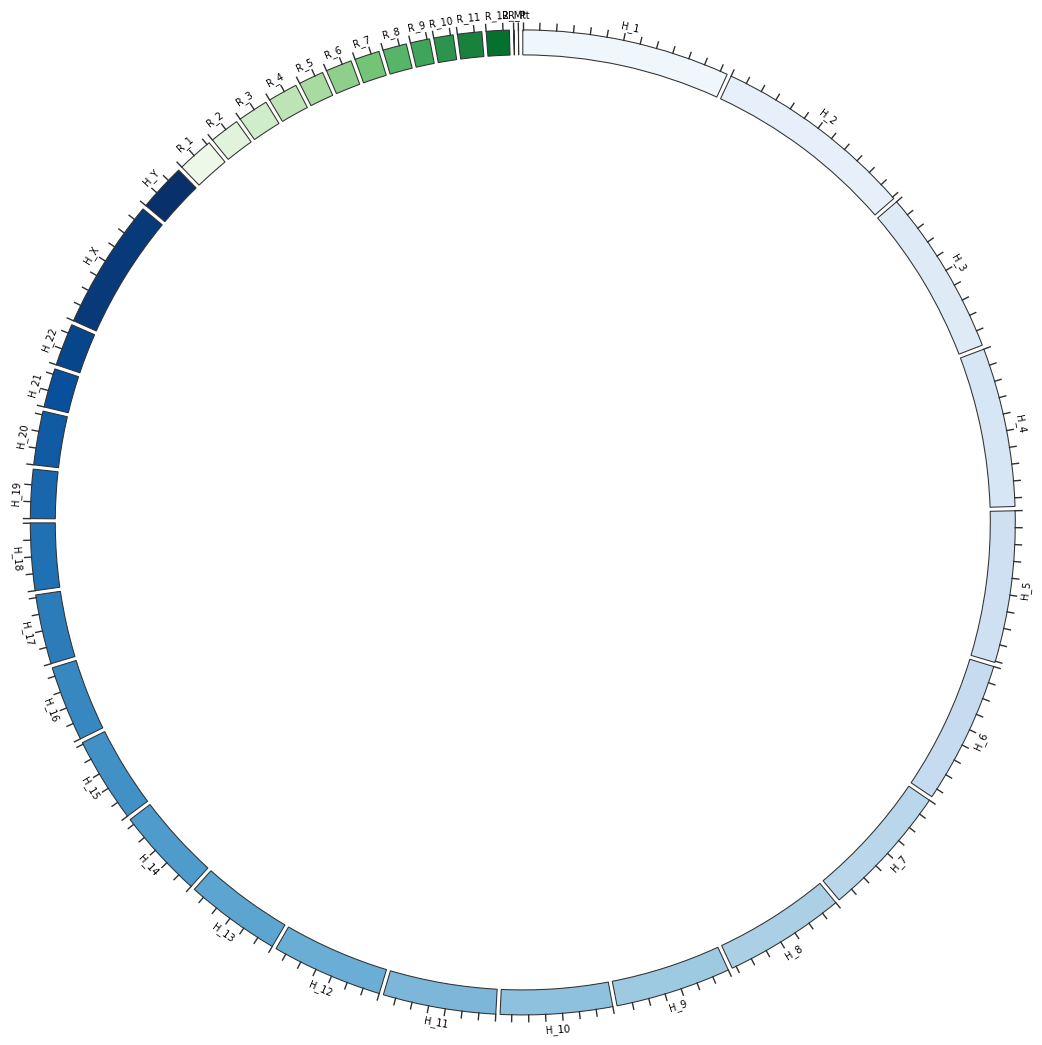

In [8]:
circle.figure

#### Scatter plot of human vs rice upregulated genes

In [12]:
#organism = "human"
df_h_score = pd.read_csv("../data/human/human_position_up.tsv", sep='\t')
df_h_score_subset = df_h_score[['Gene stable ID',
                        'Chromosome/scaffold name', 
                        'Gene start (bp)',
                        'Gene end (bp)',
                        'HN-score(HN5)']].copy()
df_h_score_subset['Chromosome/scaffold name'] = 'H_' + df_h_score_subset['Chromosome/scaffold name'].astype(str)
df_h_score_subset['organism'] = 'human'# タグをつける


# organism = "rice"
df_r_score = pd.read_csv("../data/rice_position_up.tsv", sep='\t')
df_r_score_subset = df_r_score[['Gene stable ID',
                        'Chromosome/scaffold name', 
                        'Gene start (bp)',
                        'Gene end (bp)',
                        'HN-score(HN5)']].copy()
df_r_score_subset['Chromosome/scaffold name'] = 'R_' + df_r_score_subset['Chromosome/scaffold name'].astype(str)
df_r_score_subset['organism'] = 'rice'# タグをつける


# combined human and rice DataFrame
combined_df_score = pd.concat([df_h_score_subset, df_r_score_subset])
combined_df_score.reset_index(drop=True, inplace=True)
combined_df_score.to_csv("../data/chromosome/HR_combined.tsv", sep='\t', index=False)
combined_df_score

,Gene stable ID,Chromosome/scaffold name,Gene start (bp),Gene end (bp),HN-score(HN5),organism
0,ENSG00000132952,H_13,30617693,30660770,89.0,human
1,ENSG00000198743,H_21,34073578,34106260,58.0,human
2,ENSG00000215547,H_20,31257664,31259632,83.0,human
3,ENSG00000139597,H_13,32400723,32428311,58.0,human
4,ENSG00000122035,H_13,27270830,27275192,58.0,human
...,...,...,...,...,...,...
570,Os08g0444440,R_8,21644628,21646515,71.0,rice
571,Os07g0549800,R_7,21823012,21825223,57.0,rice
572,Os01g0901600,R_1,39257838,39261362,52.0,rice
573,Os08g0546800,R_8,27382872,27384470,73.0,rice


In [13]:
# Initialize
import collections
arcdata_dict = collections.defaultdict(dict)

for index, row in combined_df_score.iterrows():
    name = row['Chromosome/scaffold name']
    start = row['Gene start (bp)']
    end = row['Gene end (bp)']
    mid = (start + end) // 2
    value = row['HN-score(HN5)']

    if name not in arcdata_dict: # arcdata_dictにnameがない場合, arcdata_dictに追加
        arcdata_dict[name]["positions"] = []
        arcdata_dict[name]["values"] = []

    arcdata_dict[name]["positions"].append(mid)
    arcdata_dict[name]["values"].append(value)


# plot
vmin, vmax = combined_df_score['HN-score(HN5)'].min(), combined_df_score['HN-score(HN5)'].max()
for key in arcdata_dict:
    circle.scatterplot(
        key,
        data=arcdata_dict[key]["values"],
        positions=arcdata_dict[key]["positions"], 
        rlim=[vmin-0.05*abs(vmin), vmax+0.05*abs(vmax)],
        raxis_range=(840, 940),
        facecolor="orangered",
        edgecolor="black",
        spine=True
    )

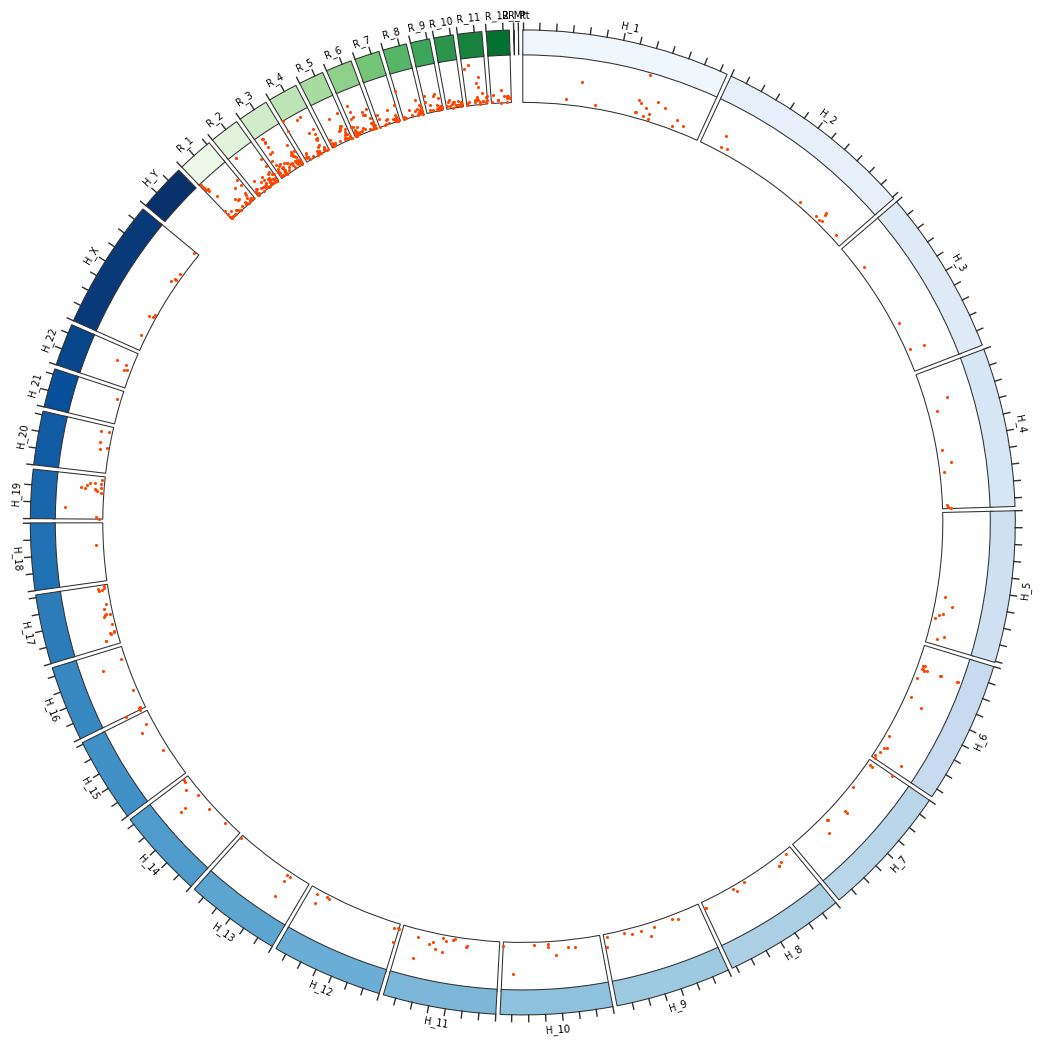

In [14]:
circle.figure